# Import the Libraries.

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import datetime

# Read the dataset.

In [362]:
df = pd.read_csv('googleplaystore.csv')
print(df.shape)   # shape of dataset (rows, columns)
df.head(2)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [363]:
# desceribe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


<Axes: >

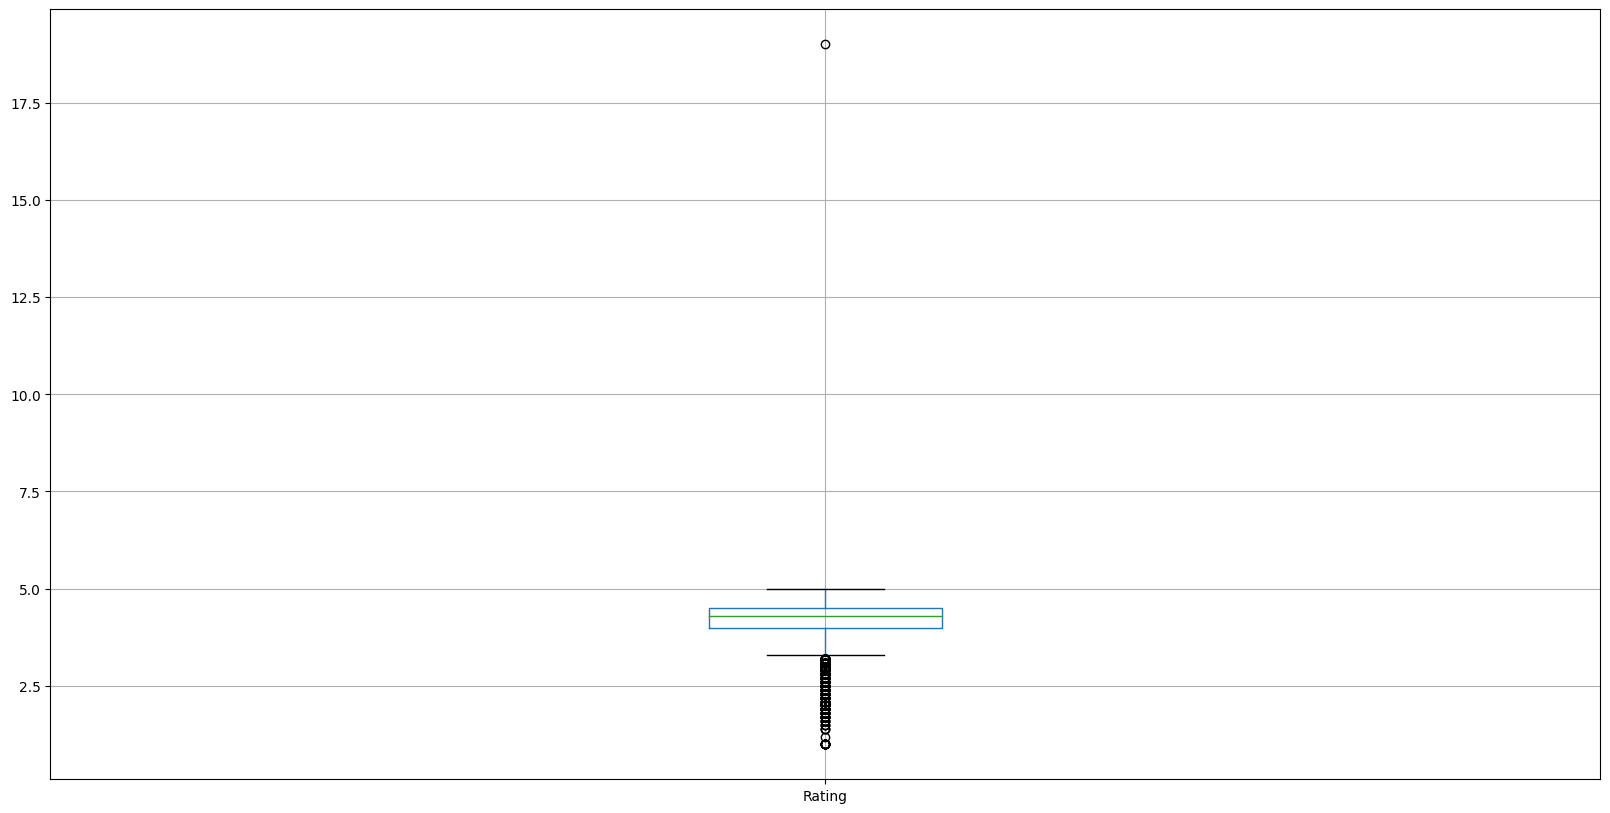

In [364]:
df.boxplot()
# so here are outliers.

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

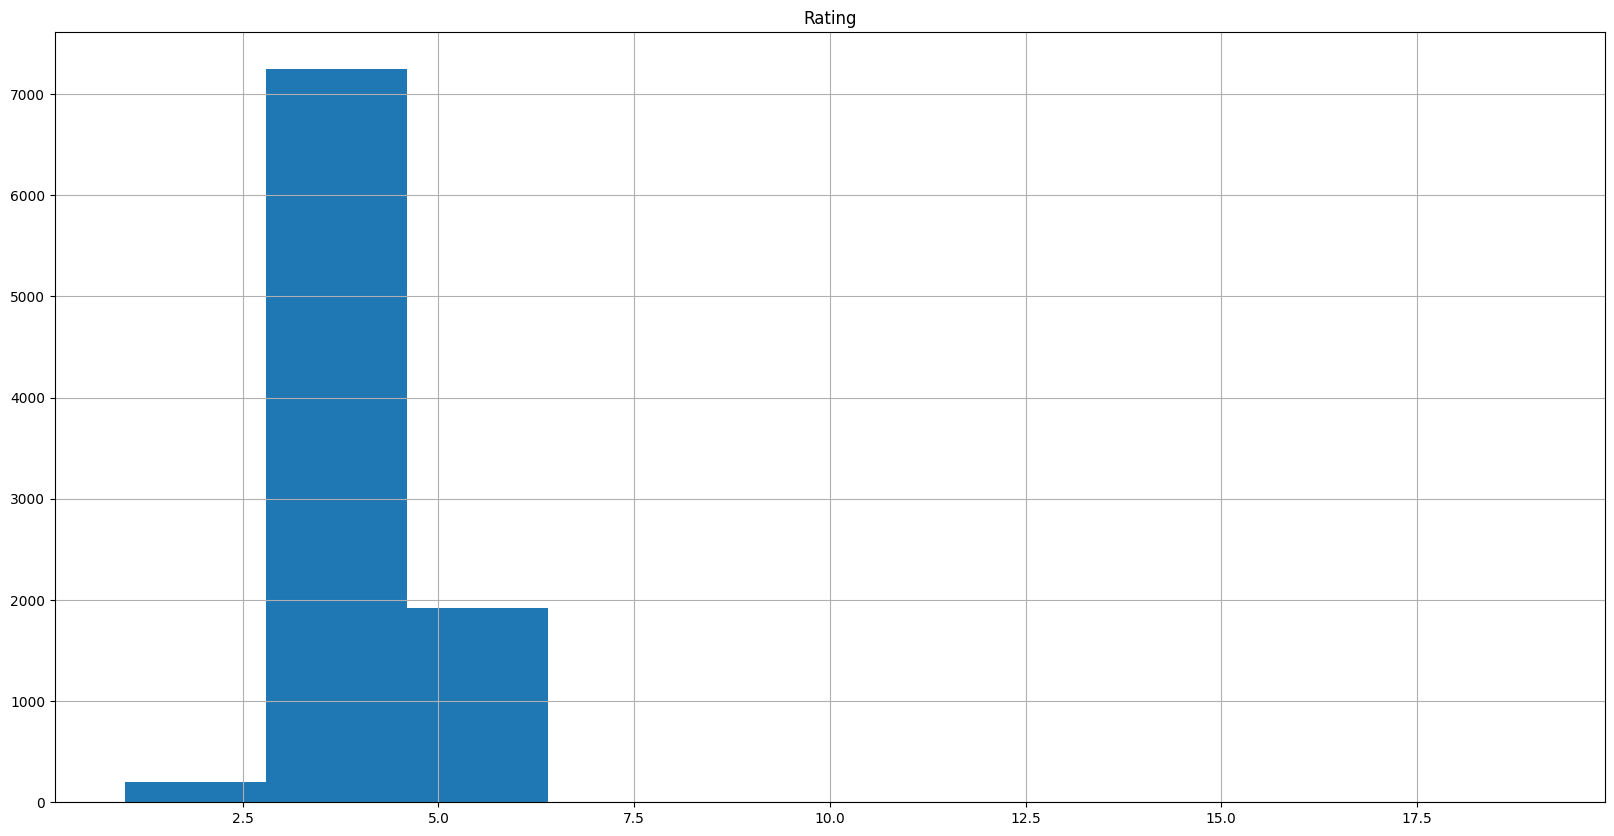

In [365]:
# histogram
df.hist()

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [367]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [368]:
# check the outliers in the Rating columns.
df[df.Rating > 5]

# so there is only one row which have rating > 5.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [369]:
# Drop this row from the dataset.

df.drop([10472], inplace = True)

<Axes: >

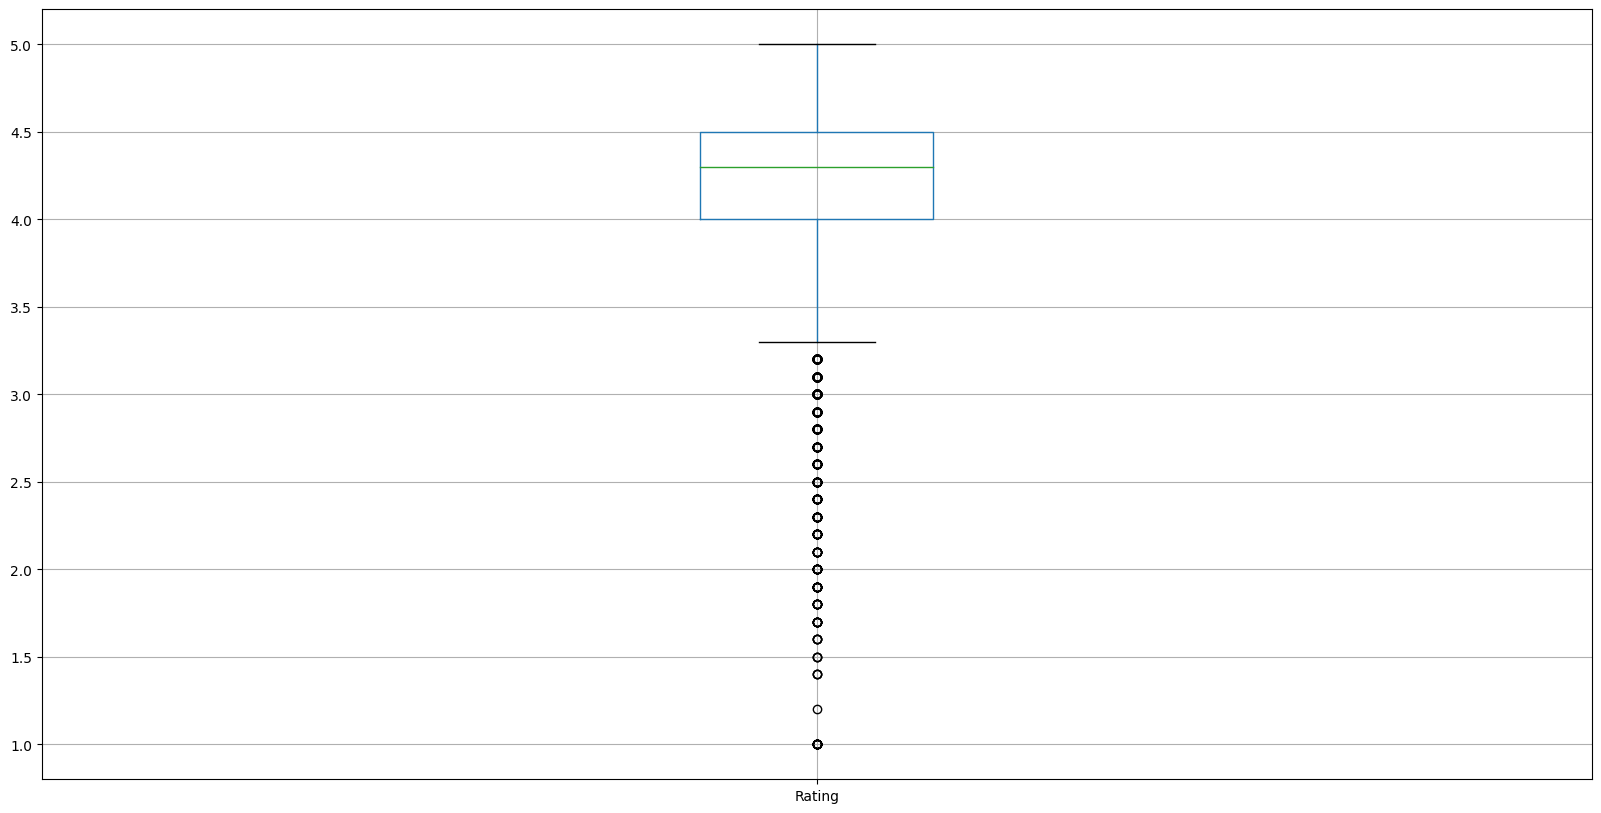

In [370]:
df.boxplot()

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

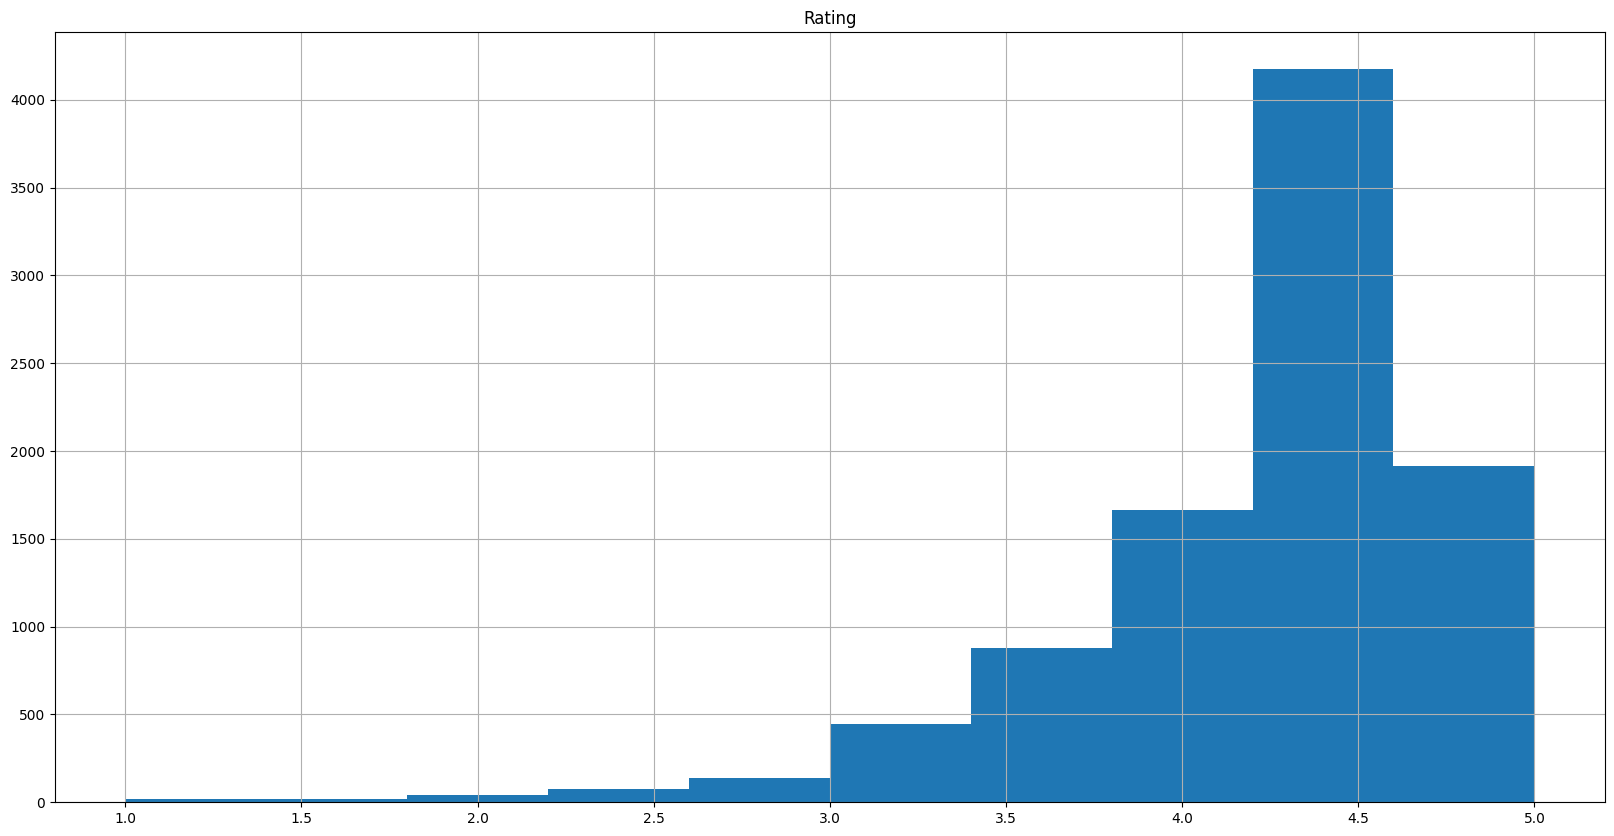

In [371]:
df.hist()

In [372]:
# Remove those columns whitch have maximum null values.
null_values_cols = len(df) * 0.1
null_values_cols

1084.0

In [373]:
df.dropna(thresh = null_values_cols, axis=1, inplace=True)

In [374]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [375]:
# fill thr null values with the median.

def null_value(col):
  return col.fillna(col.median)

df['Rating'] = df['Rating'].transform(null_value)

In [376]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [377]:
# fill others columns null values.

df['Type'].fillna(str(df['Type'].mode().values[0]), inplace =True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace =True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace =True)

In [378]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [379]:
# clean the price column
df['Price'] = df['Price'].apply(lambda x : str(x).replace('$' , '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x : float(x))

In [380]:
# Convert df['Reviews'] column into float value.
df['Reviews'] = pd.to_numeric(df['Reviews'], errors="coerce")
df['Reviews'].dtype

dtype('int64')

In [381]:
# clean the installs column
df['Installs'] = df['Installs'].apply(lambda x : str(x).replace('+' , '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x : str(x).replace(',' , '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x : float(x))

In [382]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [383]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [384]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,<bound method NDFrame._add_numeric_operations....,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000.0,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# Data Visualization

In [385]:
grp = df.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

print(x)
print("-------------------------")
print(y)
print("-------------------------")
print(z)


Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

<ipython-input-386-465d9734de81>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, 'r--', color = 'g')


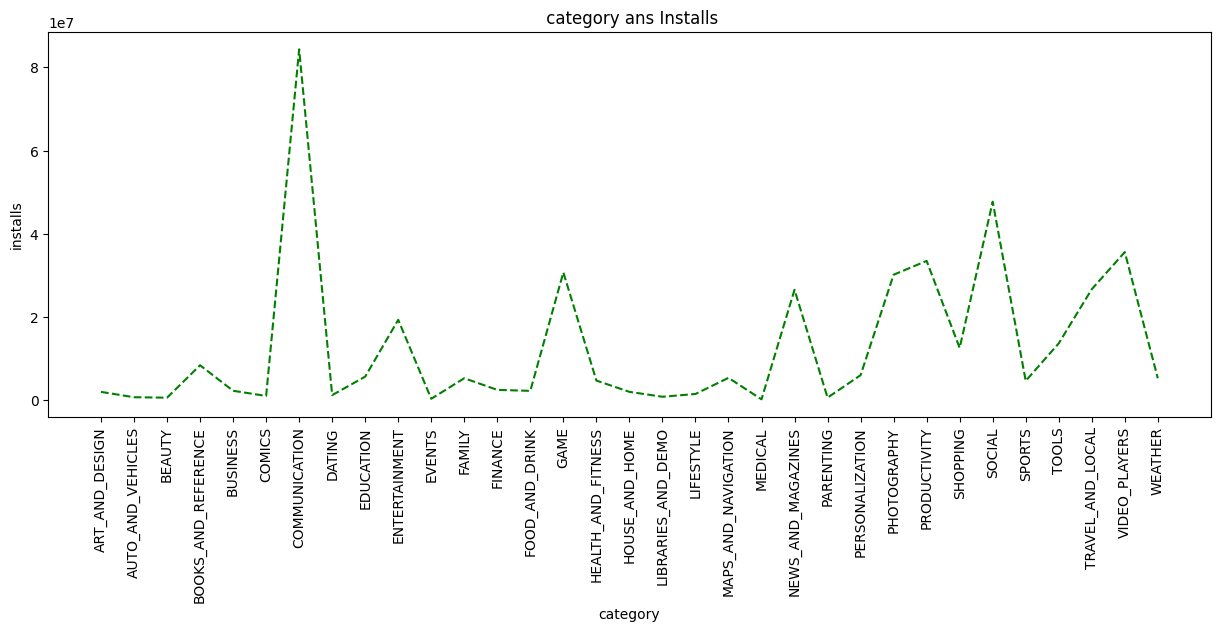

In [386]:
plt.figure(figsize = (15,5))
plt.plot(x, 'r--', color = 'g')
plt.xticks(rotation =90)
plt.title(' category ans Installs')
plt.xlabel('category')
plt.ylabel('installs')
plt.show()

<ipython-input-387-80d6c2f28910>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y, 'r--', color = 'r')


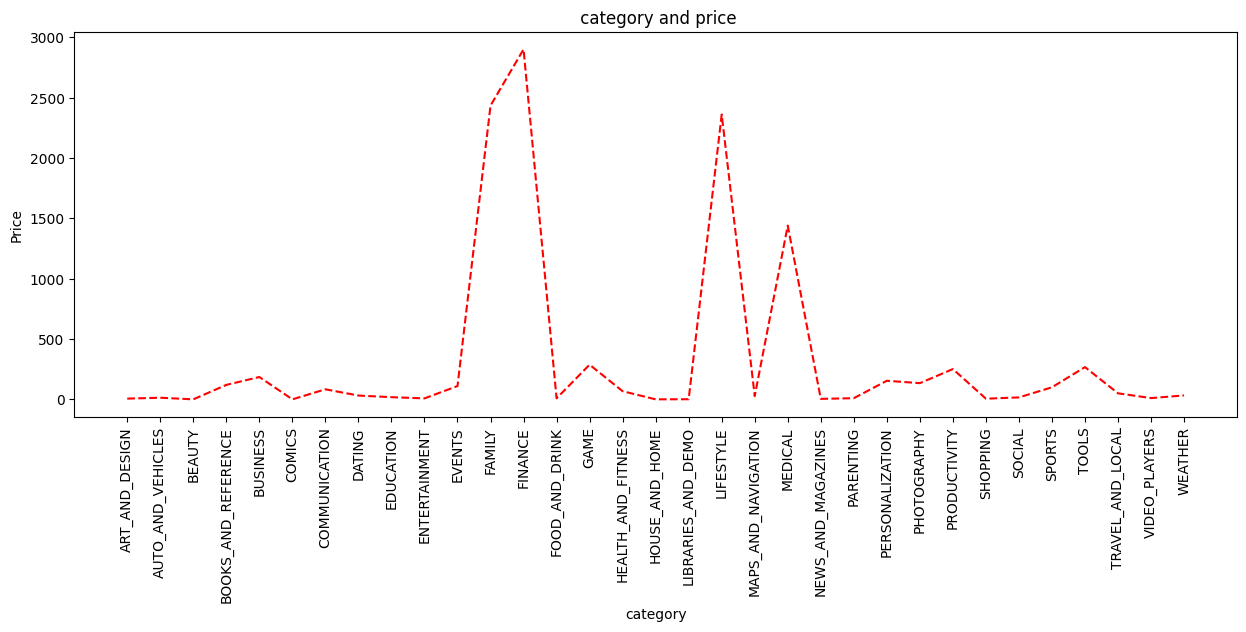

In [387]:
plt.figure(figsize = (15,5))
plt.plot(y, 'r--', color = 'r')
plt.xticks(rotation =90)
plt.title(' category and price')
plt.xlabel('category')
plt.ylabel('Price')
plt.show()

<ipython-input-388-6d2b27749185>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(z, 'r--', color = 'b')


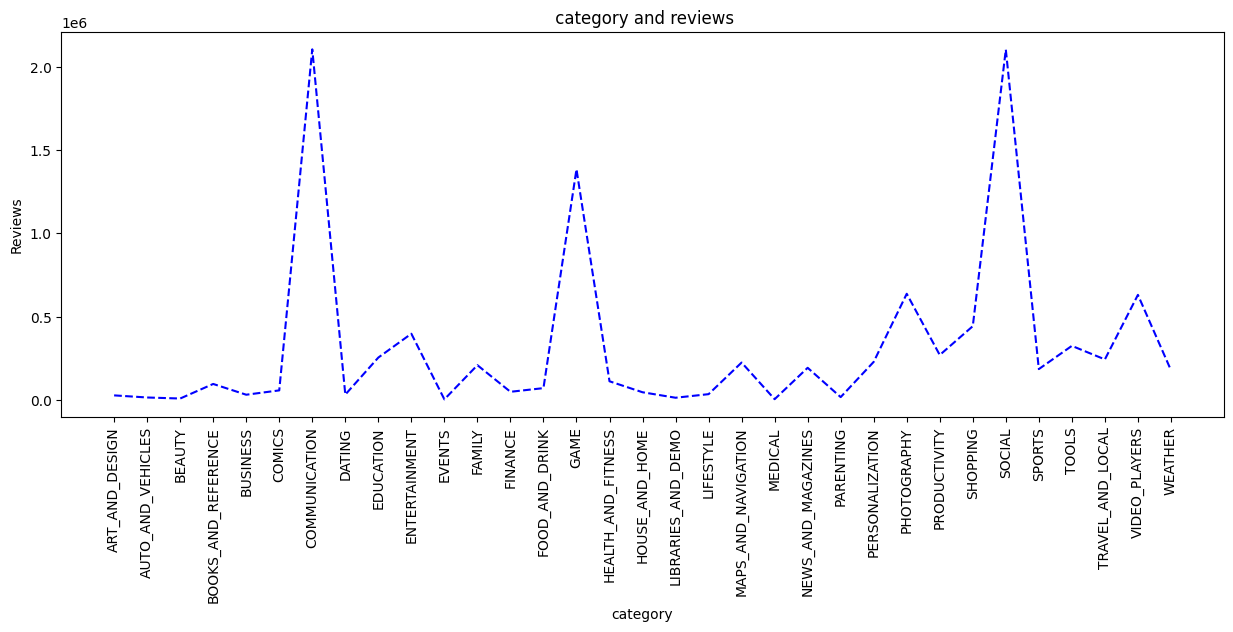

In [388]:
plt.figure(figsize = (15,5))
plt.plot(z, 'r--', color = 'b')
plt.xticks(rotation =90)
plt.title(' category and reviews')
plt.xlabel('category')
plt.ylabel('Reviews')
plt.show()

In [389]:
# clean the df['Size'] column.

df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [390]:
# There are some applications size in megabyte and some in kilobyte

# Convert mega to kilo then convert all to mega
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [391]:
#### Change Last update into a datetime column
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [392]:
df['Updated_Day']=df['Last Updated'].dt.day
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [393]:
# drop the last update column.
df.drop('Last Updated', axis=1, inplace=True)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10840 non-null  object 
 11  Android Ver     10840 non-null  object 
 12  Updated_Day     10840 non-null  int64  
 13  Updated_Month   10840 non-null  int64  
 14  Updated_Year    10840 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [395]:
null = pd.DataFrame({'Null Values' :df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
App,0,0.000000
Category,0,0.000000
Rating,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Type,0,0.000000
Price,0,0.000000
Content Rating,0,0.000000
Genres,0,0.000000


<BarContainer object of 15 artists>

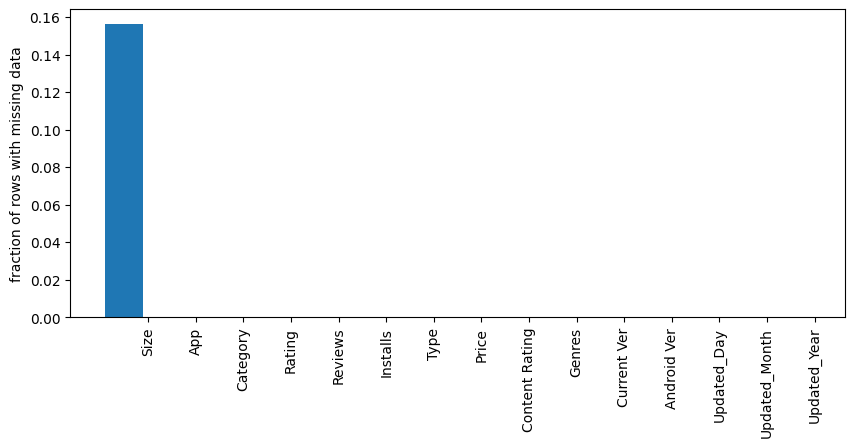

In [396]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(10,4))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [397]:
### lets create a function so that easily do it for all features
def Random_value_imputation(feature):
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum())
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [398]:
for col in df:
    Random_value_imputation(col)

In [399]:
null_v = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null_v

,Null Values,Percentage Null Values
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


<BarContainer object of 15 artists>

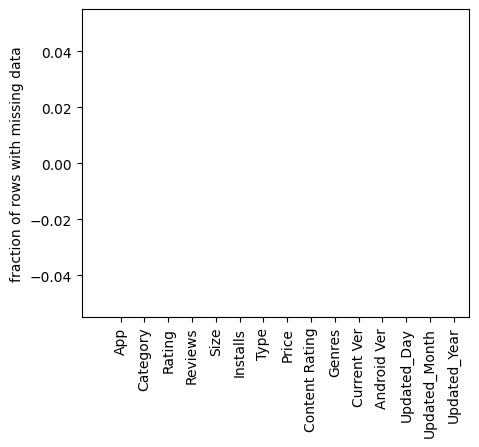

In [400]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(5,4))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [401]:
# remove the duplicates.
duplicate = df.duplicated()
print(duplicate.sum())

315


In [402]:
df.drop_duplicates(inplace=True)

duplicate = df.duplicated()
print(duplicate.sum())

0


In [403]:
# Convert df['Rating'] column into float value.
df['Rating'] = pd.to_numeric(df['Rating'], errors="coerce")
df['Rating'].dtype

dtype('float64')

In [404]:
# drop all the null values.
df.dropna(how="any",inplace=True)

Extract Numerical & Categorical Features

In [405]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Day',
 'Updated_Month',
 'Updated_Year']

In [406]:
num_data = df[num_features]
num_data.head()

,Rating,Reviews,Size,Installs,Price,Updated_Day,Updated_Month,Updated_Year
0,4.1,159,19.0,10000.0,0.0,7,1,2018
1,3.9,967,14.0,500000.0,0.0,15,1,2018
2,4.7,87510,8.7,5000000.0,0.0,1,8,2018
3,4.5,215644,25.0,50000000.0,0.0,8,6,2018
4,4.3,967,2.8,100000.0,0.0,20,6,2018


In [407]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [408]:
categorical=df[cat_features]
categorical.head()

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up


Check Qutliers

In [409]:
def outlier_thresholds(dataframe, variable):
    q1 = dataframe[variable].quantile(0.10)
    q3 = dataframe[variable].quantile(0.90)
    interquantile_range = q3 - q1
    up_limit = q3 + 1.5 * interquantile_range
    low_limit = q1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [410]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [411]:
for col in num_data.columns:
    has_outliers(num_data, col)

Rating yes
Rating no
Reviews yes
Reviews no
Size no
Installs yes
Installs no
Price yes
Price no
Updated_Day no
Updated_Month no
Updated_Year yes
Updated_Year no


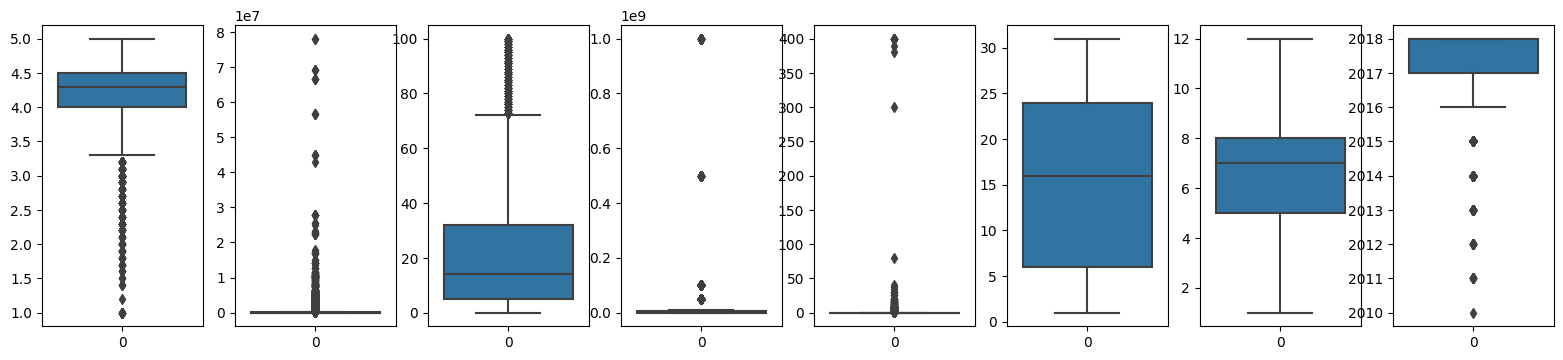

In [412]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [413]:
## function to get ride of qutliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [414]:
replace_with_thresholds(num_data, num_data.columns)

In [415]:
for col in num_data.columns:
    has_outliers(num_data, col)

Rating no
Reviews no
Size no
Installs no
Price no
Updated_Day no
Updated_Month no
Updated_Year no


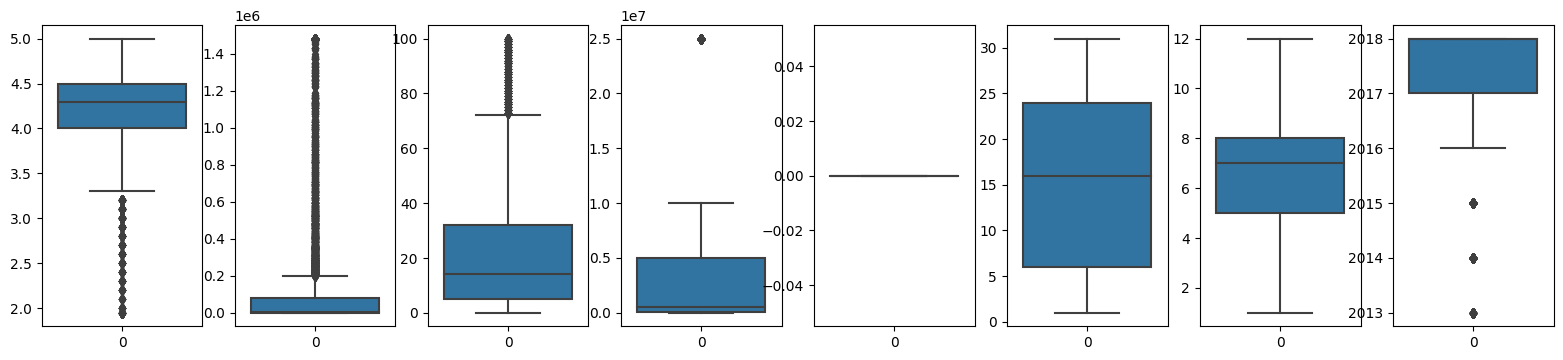

In [416]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [417]:
# categorical columns
categorical['Category'].value_counts()

FAMILY                 1721
GAME                   1082
TOOLS                   734
PRODUCTIVITY            347
COMMUNICATION           322
FINANCE                 320
PERSONALIZATION         313
LIFESTYLE               307
PHOTOGRAPHY             306
SPORTS                  304
MEDICAL                 303
BUSINESS                282
HEALTH_AND_FITNESS      273
SOCIAL                  252
NEWS_AND_MAGAZINES      226
SHOPPING                218
TRAVEL_AND_LOCAL        213
BOOKS_AND_REFERENCE     177
DATING                  163
VIDEO_PLAYERS           160
EDUCATION               140
ENTERTAINMENT           126
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          107
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           70
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

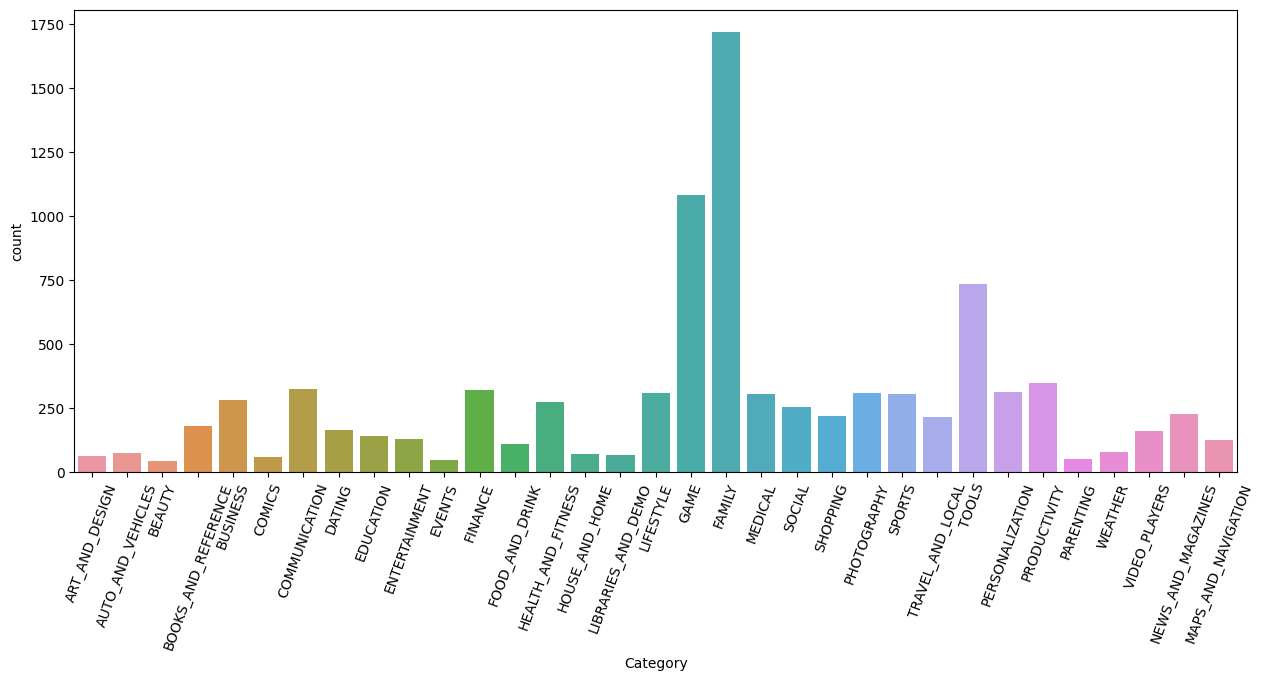

In [418]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(x='Category',data=df)
plt.xticks(rotation=70)

In [419]:
categorical['Type'].value_counts()

Free    8445
Paid     615
Name: Type, dtype: int64

(array([0, 1]), [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

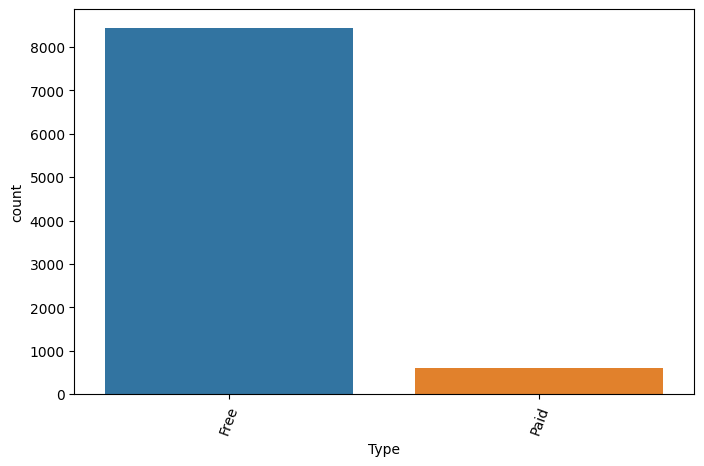

In [420]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=df)
plt.xticks(rotation=70)

In [421]:
categorical['Content Rating'].value_counts()

Everyone           7205
Teen               1048
Mature 17+          425
Everyone 10+        378
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

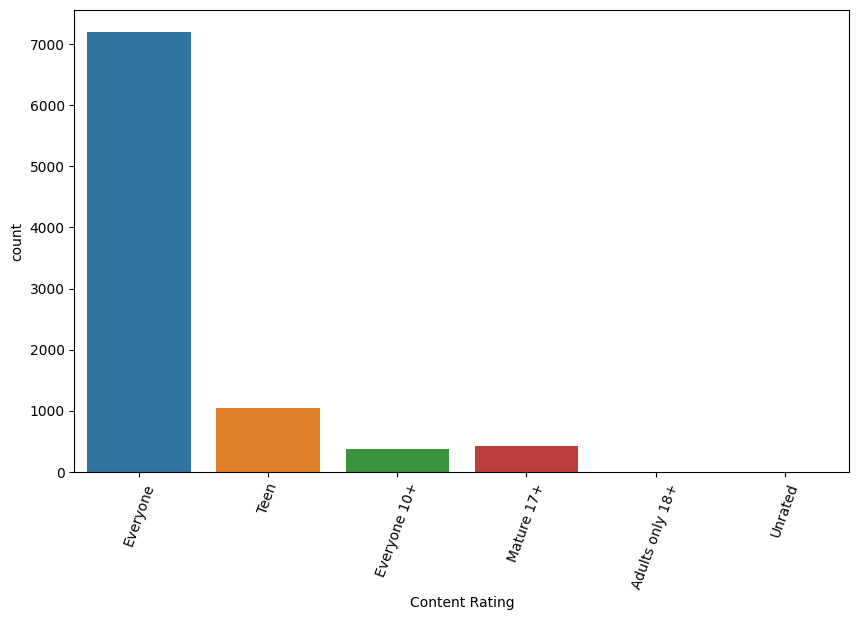

In [422]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(x='Content Rating',data=df)
plt.xticks(rotation=70)

Content Rating vs Rating Analysis

<Axes: xlabel='Content Rating', ylabel='Installs'>

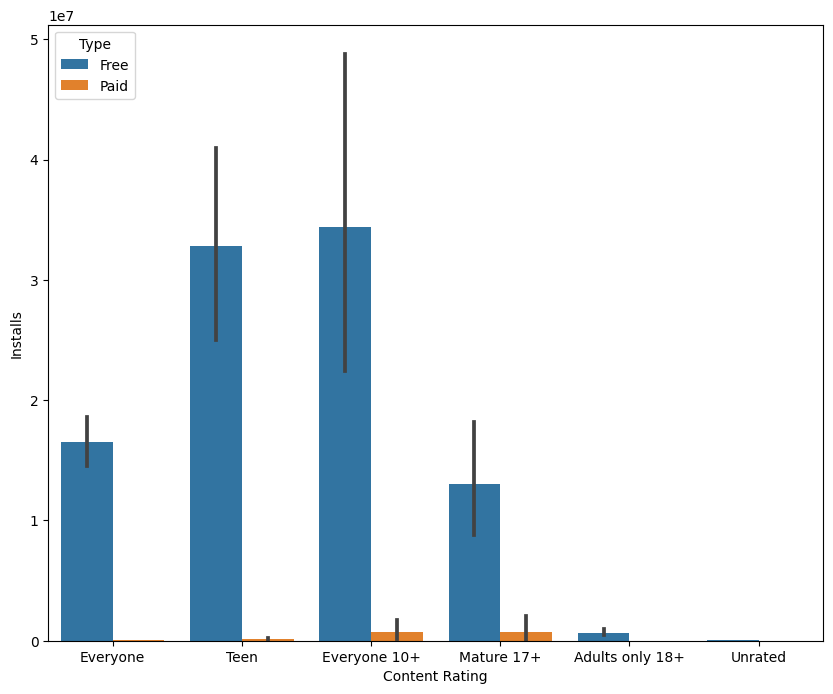

In [423]:
plt.figure(figsize=(10,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df)

In [424]:
categorical['Genres'].value_counts()

Tools                          733
Entertainment                  513
Education                      455
Action                         354
Productivity                   347
                              ... 
Casual;Music & Video             1
Board;Pretend Play               1
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Strategy;Creativity              1
Name: Genres, Length: 115, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]),
 [Text(0, 0, 'Art & Design'),
  Text(1, 0, 'Art & Design;Pretend Play'),
  Text(2, 0, 'Art & Design;Creativity'),
  Text(3, 0, 'Auto & Vehicles'),
  Text(4, 0, 'Beauty'),
  Text(5, 0, 'Books & Reference'),
  Text(6, 0, 'Business'),
  Text(7, 0, 'Comics'),
  Text(8, 0, 'Comics;Creativity'),
  Text(9, 0, 'Communication'),
  Text(10, 0, 'Dating'),
  Te

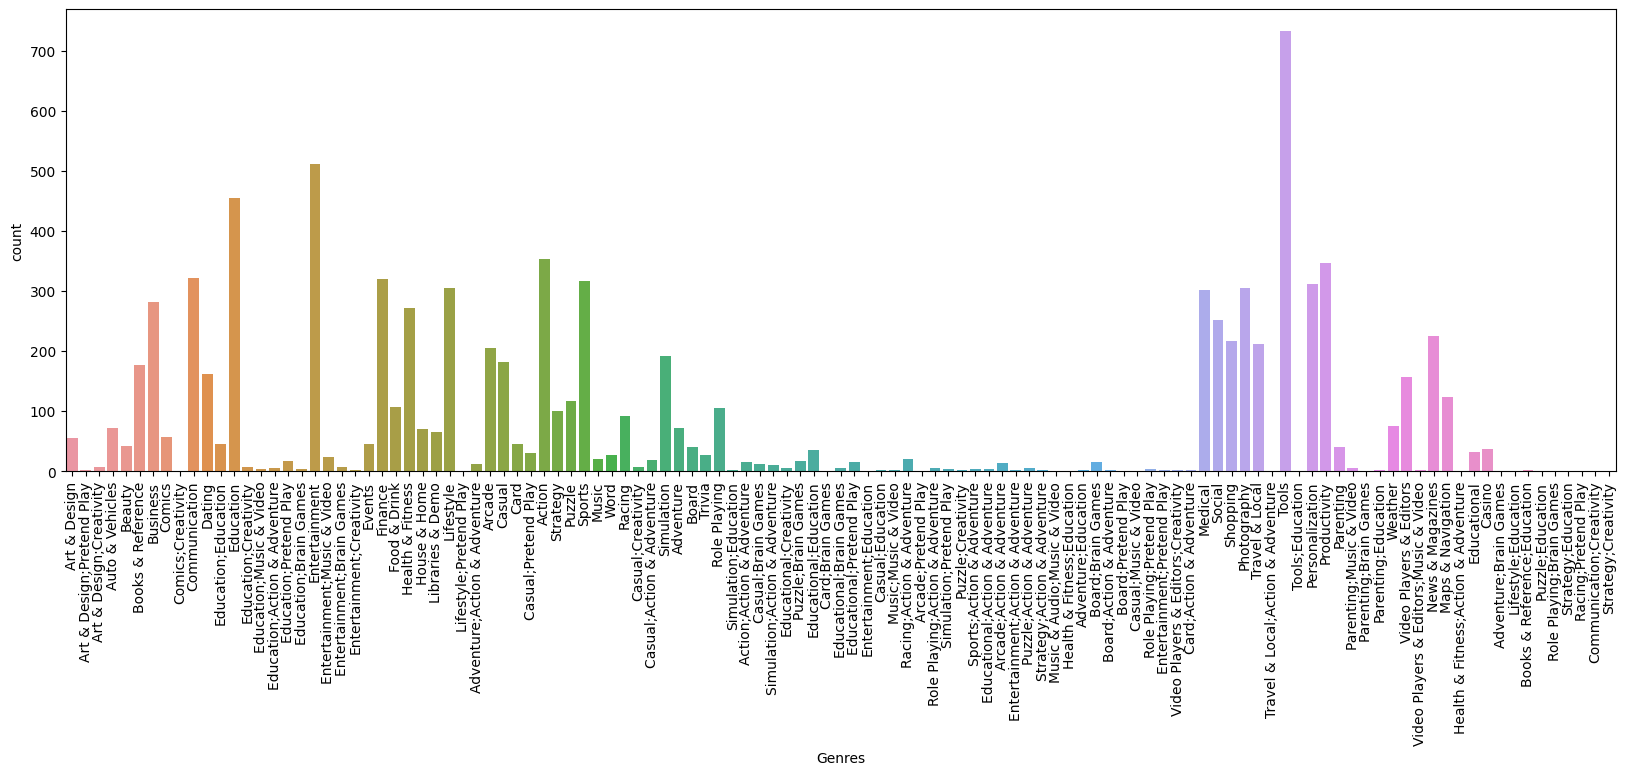

In [425]:
plt.rcParams['figure.figsize'] = (20, 6)
sns.countplot(x='Genres',data=df)
plt.xticks(rotation=90)

In [426]:
# current version
categorical['Current Ver'].value_counts()

Varies with device    1414
1.0                    451
1.1                    191
1.2                    126
2.0                    117
                      ... 
8.0.1.0                  1
2.2.1B216                1
3.5.12                   1
1.10.0.33_180403         1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [427]:
# android version
categorical['Android Ver'].value_counts()

4.1 and up            1995
Varies with device    1316
4.0.3 and up          1199
4.0 and up            1095
4.4 and up             799
2.3 and up             574
5.0 and up             491
4.2 and up             331
2.3.3 and up           238
3.0 and up             207
2.2 and up             203
4.3 and up             199
2.1 and up             112
1.6 and up              87
6.0 and up              46
7.0 and up              41
3.2 and up              31
2.0 and up              27
1.5 and up              16
5.1 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              5
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '4.0.3 and up'),
  Text(1, 0, '4.2 and up'),
  Text(2, 0, '4.4 and up'),
  Text(3, 0, '2.3 and up'),
  Text(4, 0, '3.0 and up'),
  Text(5, 0, '4.1 and up'),
  Text(6, 0, '4.0 and up'),
  Text(7, 0, '2.3.3 and up'),
  Text(8, 0, 'Varies with device'),
  Text(9, 0, '2.2 and up'),
  Text(10, 0, '5.0 and up'),
  Text(11, 0, '6.0 and up'),
  Text(12, 0, '1.6 and up'),
  Text(13, 0, '1.5 and up'),
  Text(14, 0, '2.1 and up'),
  Text(15, 0, '7.0 and up'),
  Text(16, 0, '4.3 and up'),
  Text(17, 0, '4.0.3 - 7.1.1'),
  Text(18, 0, '2.0 and up'),
  Text(19, 0, '3.2 and up'),
  Text(20, 0, '4.4W and up'),
  Text(21, 0, '5.1 and up'),
  Text(22, 0, '7.1 and up'),
  Text(23, 0, '7.0 - 7.1.1'),
  Text(24, 0, '8.0 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '3.1 and up'),
  Text(27, 0, '2.0.1 and up'),
  Text(28, 0, '4.1 - 7.1.1'),
  Text(2

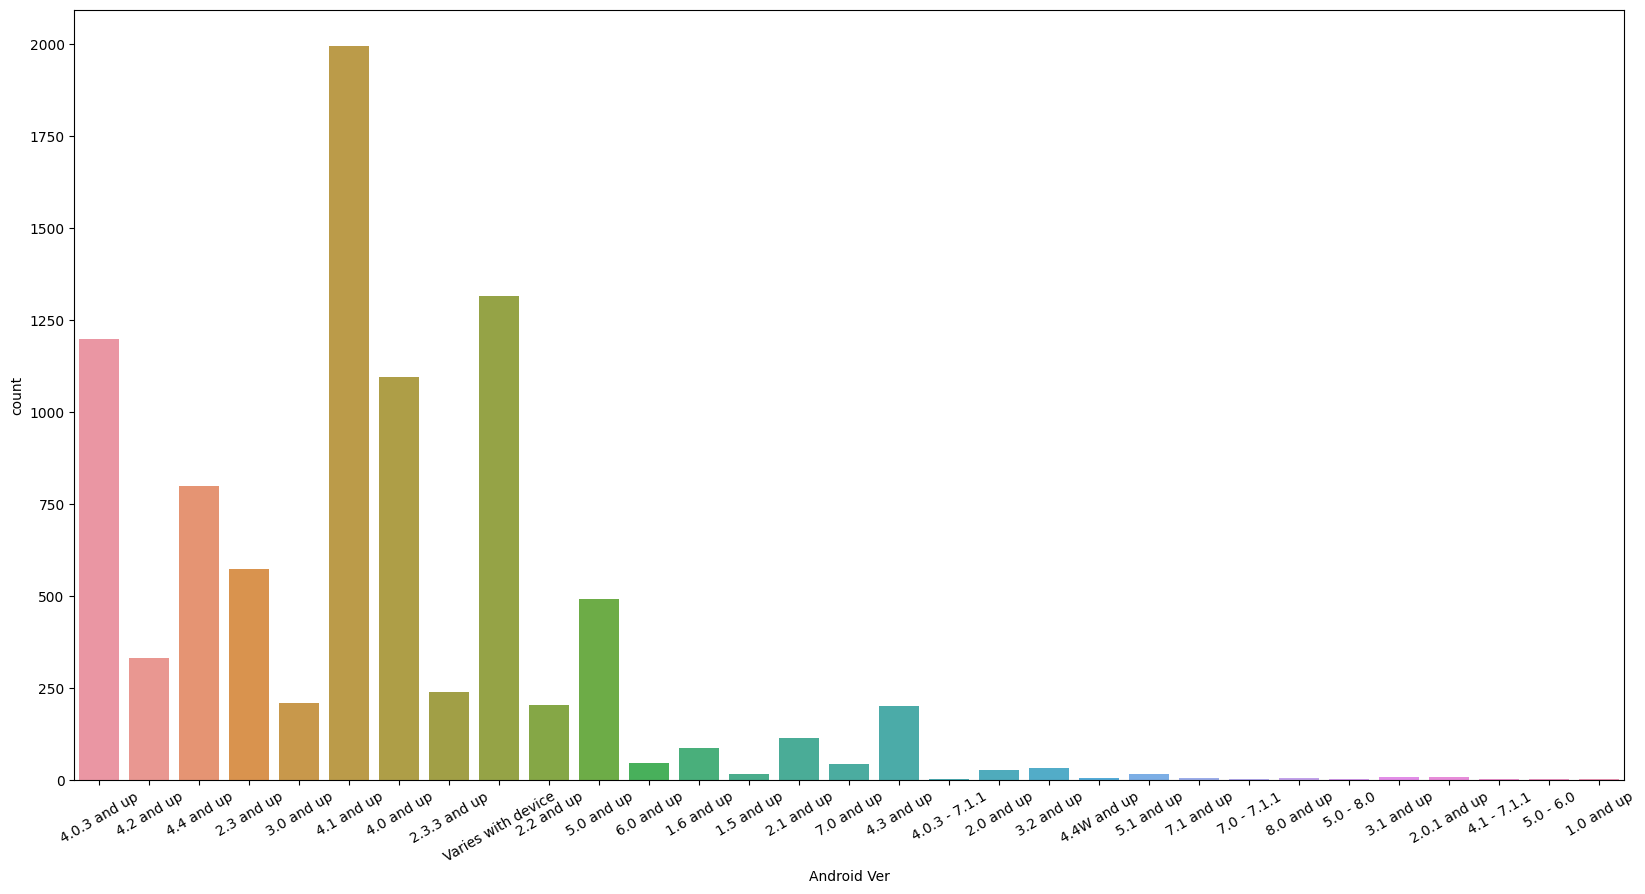

In [428]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Android Ver',data=df)
plt.xticks(rotation=30)

# Saprate dependent and independent features

In [429]:
y=df['Rating']
X=num_data
cols=X.columns
cols

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Updated_Day',
       'Updated_Month', 'Updated_Year'],
      dtype='object')

In [430]:
X.isnull().sum()

Rating           0
Reviews          0
Size             0
Installs         0
Price            0
Updated_Day      0
Updated_Month    0
Updated_Year     0
dtype: int64

In [431]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [432]:
# Import Libraries
from sklearn.preprocessing import StandardScaler

In [433]:
#Creating a StandardScaler object to normalize the X train and test set feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [434]:
type(y_train)

pandas.core.series.Series

###  ML model - GradientBoostingRegressor

In [435]:
from sklearn.ensemble import GradientBoostingRegressor
gd = GradientBoostingRegressor()

In [436]:
from sklearn.metrics import r2_score

In [437]:
model_1=gd.fit(X_train,y_train)
print('Training score : {}'.format(model_1.score(X_train,y_train)))

Training score : 0.9996202807709842


In [438]:
prediction_1 = model_1.predict(X_test)

In [439]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction_1)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9978548403298069


# ML Model  - Multilinear Regression

In [440]:
from sklearn.linear_model import LinearRegression
rg = LinearRegression()


In [441]:
model_2 = rg.fit(X_train,y_train)

In [442]:
prediction_2 = model_2.predict(X_test)

In [443]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction_2)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9937193090761015
